In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

## 시간 정보가 포함된 데이터 살펴보기(시계열데이터)

In [2]:
# 수집처 : https://www.blockchain.com/ko/charts/market-price

bitcoin_df = pd.read_csv('data10/market-price.csv')
bitcoin_df.columns = ['day', 'price']
bitcoin_df

,day,price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000
...,...,...
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231


In [3]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [4]:
bitcoin_df['price'].describe()

count      365.000000
mean      8395.863578
std       3239.804756
min       3319.630000
25%       6396.772500
50%       7685.633333
75%       9630.136277
max      19498.683333
Name: price, dtype: float64

##  시계열 데이터 살펴보기

In [5]:
# object 타입의 day컬럼을 datetime으로 변경한다.
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     365 non-null    datetime64[ns]
 1   price   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [6]:
# day 컬럼을 인덱스로 설정한다.
bitcoin_df.set_index('day',inplace=True)
bitcoin_df

,price
day,
2017-08-27,4354.308333
2017-08-28,4391.673517
2017-08-29,4607.985450
2017-08-30,4594.987850
2017-08-31,4748.255000
...,...
2018-08-22,6575.229167
2018-08-23,6434.881667
2018-08-24,6543.645714


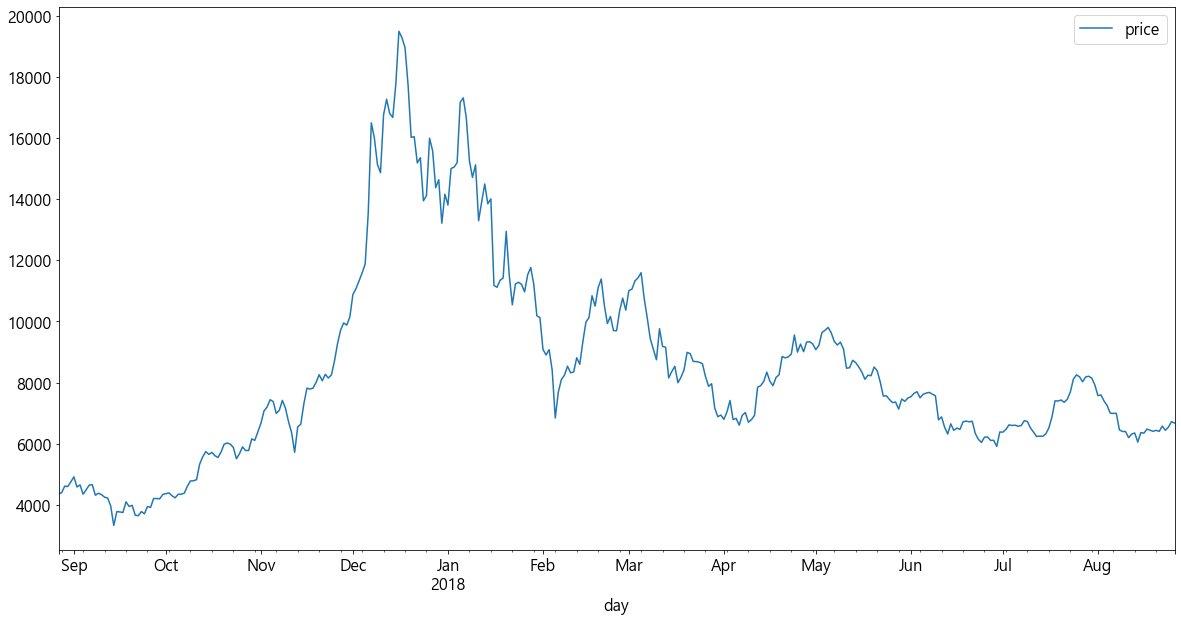

In [7]:
#일자별 비트코인 시세를 시각화한다.
bitcoin_df.plot()
plt.show()


### 시세 예측 - ARIMA 모델 적용

In [8]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [9]:
model = ARIMA(bitcoin_df['price'].values, order=(2, 1, 2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2787.553
Method:                       css-mle   S.D. of innovations            512.415
Date:                Wed, 17 Mar 2021   AIC                           5587.107
Time:                        15:47:57   BIC                           5610.490
Sample:                             1   HQIC                          5596.400
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3552     27.794      0.229      0.819     -48.121      60.831
ar.L1.D.y     -0.3789      1.829     -0.207      0.836      -3.963       3.205
ar.L2.D.y      0.1585      1.192      0.133      0.894      -2.178       2.495
ma.L1.D.y      0.4570      1.824      0.251      0.802      -3.118       4.032
ma.L2.D.y     -0.1941      1.339     -0.145      0.885      -2.818       2.430
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5864           +0.0000j            1.5864            0.5000
AR.2            3.9773           +0.0000j            3.9773            0.0000
MA.1           -1.3797           +0.0000j            1.3797            0.5000
MA.2            3.7350           +0.0000j            3.7350            0.0000
-----------------------------------------------------------------------------
"""

## 모델 성능과 예측 결과 시각화

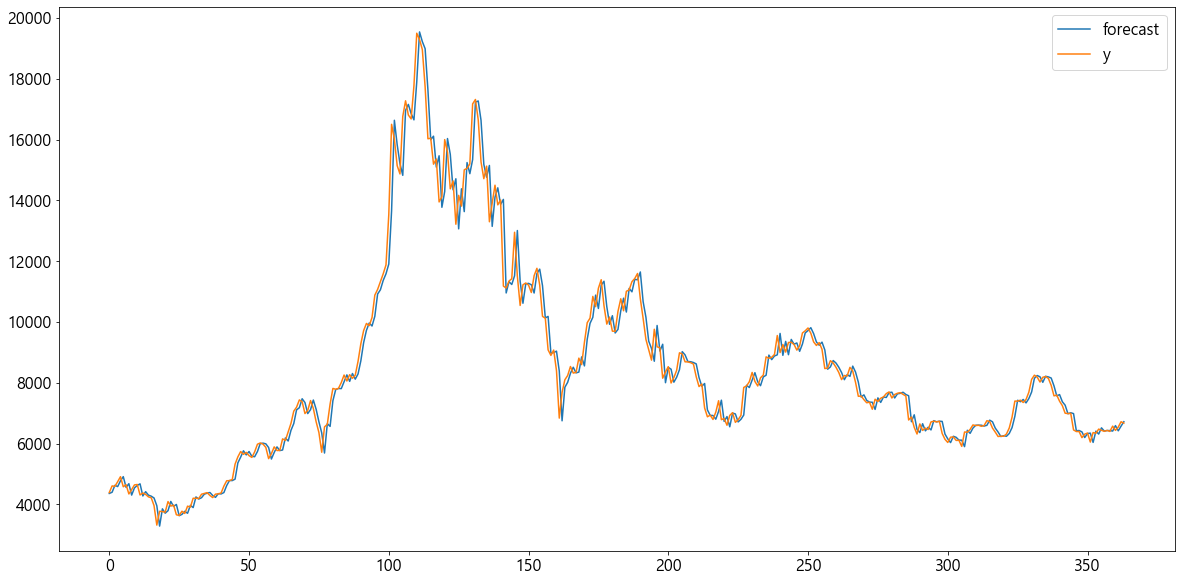

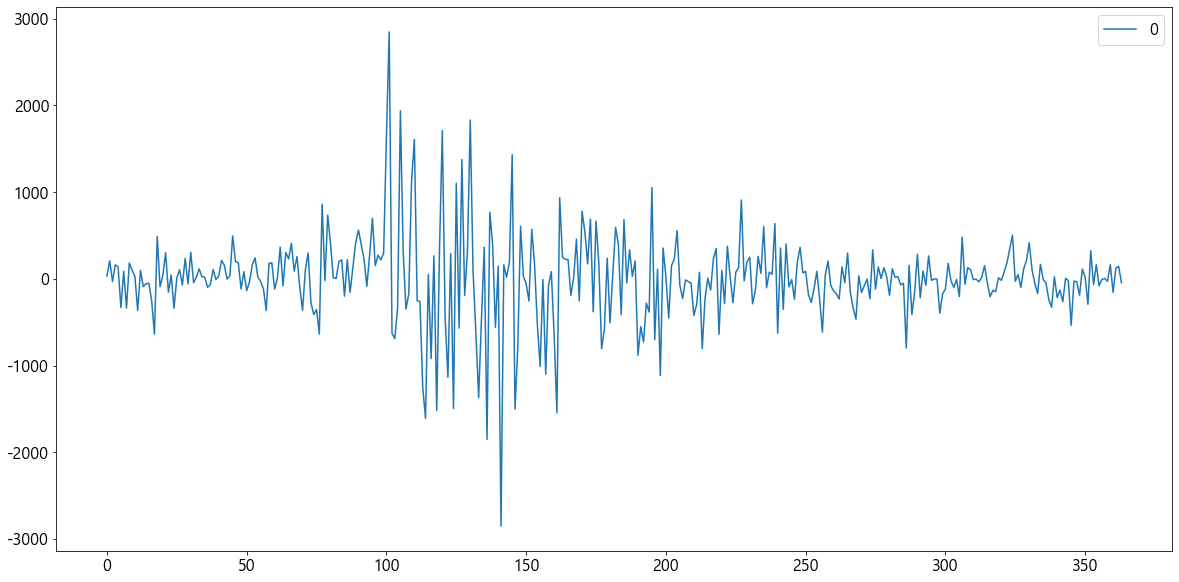

In [10]:
# 학습데이터에 대한 예측 결과
fig = model_fit.plot_predict()
# 변동폭
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

## 데이터 예측

In [11]:
# 학습 데이터 이후 5일치를 예측한다.
forecast_data = model_fit.forecast(steps =5 )
forecast_data

(array([6676.91919591, 6685.05349496, 6690.30505257, 6697.36042324,
        6703.27541994]),
 array([ 512.4152976 ,  753.50488406,  914.97930711, 1061.4557826 ,
        1184.44221804]),
 array([[5672.60366748, 7681.23472433],
        [5208.21106002, 8161.8959299 ],
        [4896.97856404, 8483.63154109],
        [4616.94531816, 8777.77552832],
        [4381.81133081, 9024.73950907]]))

In [12]:
# 테스트 데이터를 불러온다.
bitcoin_test_df = pd.read_csv('data10/market-price-test.csv')
bitcoin_test_df.columns = ['day','price']
bitcoin_test_df

,day,price
0,2018-08-27 00:00:00,6719.266154
1,2018-08-28 00:00:00,7000.040000
2,2018-08-29 00:00:00,7054.276429
3,2018-08-30 00:00:00,6932.662500
4,2018-08-31 00:00:00,6981.946154


In [13]:
# 예측결과 추출
pred_y = forecast_data[0].tolist()
# 진짜 결과 추출
test_y = bitcoin_test_df['price'].values

print(pred_y)
print(test_y)

[6676.919195905327, 6685.053494963976, 6690.305052566362, 6697.360423239279, 6703.275419938793]
[6719.26615385 7000.04       7054.27642857 6932.6625     6981.94615385]


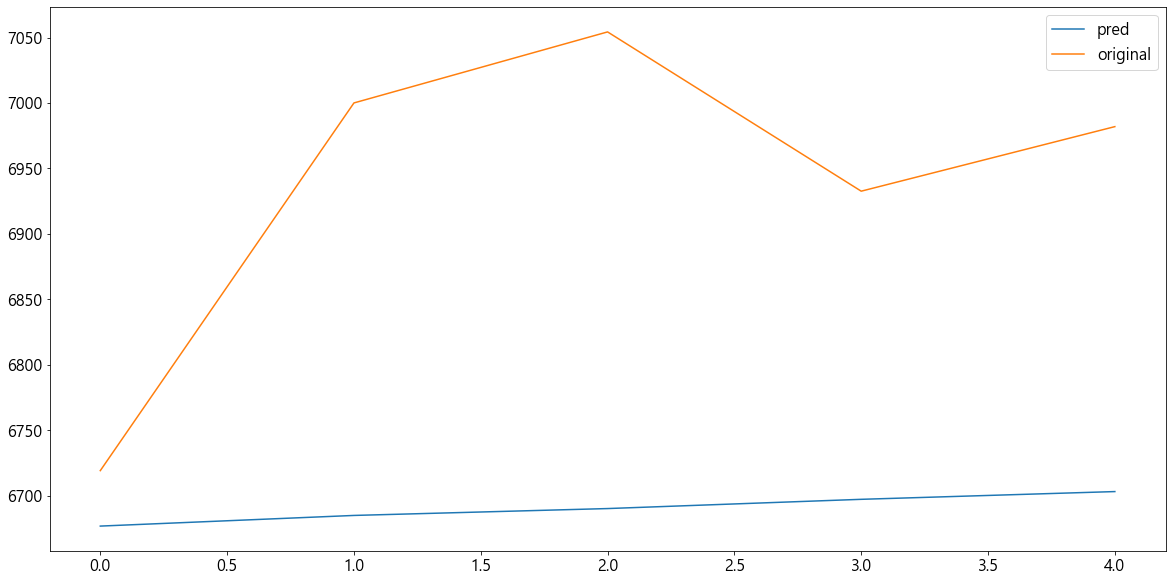

In [14]:
plt.plot(pred_y, label='pred' )
plt.plot(test_y, label='original')

plt.legend()
plt.show()

### Facebook Prophet 사용

- conda install -c conda-forge fbprophet


In [15]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [16]:
# prophet을 사용하기 위해서는 날짜는 ds, 결과는 y로 설정해야한다.
bitcoin_df = pd.read_csv('data10/market-price.csv')
bitcoin_df.columns = ['ds', 'y']
bitcoin_df

,ds,y
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000
...,...,...
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231


In [17]:
# prophet 생성
# seasonlity_mode : 트랜드 분석 방식을 설정
# multiplicative를 주면 다양한 기준으로 분석을 하게 된다.
# yearly_seasonality : 연간 트랜드
# weekly_seasonality : 주간 트랜드
# daily_seasonality : 일단 트랜드
prophet = Prophet(seasonality_mode='multiplicative',
                 yearly_seasonality=True,
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)


## 모델로 부터 예측할 기간을 정의하고, 결과를 도출

In [18]:
# 5일을 내다보며 예측한다.
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2017-08-27,463.067893,3822.630319,5114.016820,463.067893,463.067893,9.795516,9.795516,9.795516,8.665447,...,-0.037672,-0.037672,-0.037672,-1.092397,-1.092397,-1.092397,0.0,0.0,0.0,4475.758098
1,2017-08-28,465.717337,3830.967010,5180.941195,465.717337,465.717337,9.795516,9.795516,9.795516,8.738009,...,-0.008579,-0.008579,-0.008579,-1.048927,-1.048927,-1.048927,0.0,0.0,0.0,4535.159819
2,2017-08-29,468.366782,3942.494369,5220.500558,468.366782,468.366782,9.795516,9.795516,9.795516,8.795395,...,0.021390,0.021390,0.021390,-1.021511,-1.021511,-1.021511,0.0,0.0,0.0,4587.837690
3,2017-08-30,471.016226,3969.878594,5240.016513,471.016226,471.016226,9.795516,9.795516,9.795516,8.732618,...,-0.050000,-0.050000,-0.050000,-1.012898,-1.012898,-1.012898,0.0,0.0,0.0,4584.221002
4,2017-08-31,473.665670,3956.229227,5276.076760,473.665670,473.665670,9.795516,9.795516,9.795516,8.748505,...,-0.021787,-0.021787,-0.021787,-1.025224,-1.025224,-1.025224,0.0,0.0,0.0,4617.532124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2018-08-27,710.869218,6247.550117,7544.588830,710.869218,710.869218,9.795516,9.795516,9.795516,8.681537,...,-0.008579,-0.008579,-0.008579,-1.105399,-1.105399,-1.105399,0.0,0.0,0.0,6882.306915
366,2018-08-28,714.864451,6270.356476,7644.614762,714.864451,714.864451,9.795516,9.795516,9.795516,8.758497,...,0.021390,0.021390,0.021390,-1.058409,-1.058409,-1.058409,0.0,0.0,0.0,6976.002532
367,2018-08-29,718.859685,6287.815729,7723.136579,718.859685,719.126332,9.795516,9.795516,9.795516,8.718816,...,-0.050000,-0.050000,-0.050000,-1.026699,-1.026699,-1.026699,0.0,0.0,0.0,6986.465207
368,2018-08-30,722.854919,6320.234414,7796.005374,720.093852,728.081768,9.795516,9.795516,9.795516,8.760568,...,-0.021787,-0.021787,-0.021787,-1.013160,-1.013160,-1.013160,0.0,0.0,0.0,7055.474837


In [19]:
#  예측 결과
forecast_data.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
365,2018-08-27,710.869218,6247.550117,7544.588830,710.869218,710.869218,9.795516,9.795516,9.795516,8.681537,...,-0.008579,-0.008579,-0.008579,-1.105399,-1.105399,-1.105399,0.0,0.0,0.0,6882.306915
366,2018-08-28,714.864451,6270.356476,7644.614762,714.864451,714.864451,9.795516,9.795516,9.795516,8.758497,...,0.021390,0.021390,0.021390,-1.058409,-1.058409,-1.058409,0.0,0.0,0.0,6976.002532
367,2018-08-29,718.859685,6287.815729,7723.136579,718.859685,719.126332,9.795516,9.795516,9.795516,8.718816,...,-0.050000,-0.050000,-0.050000,-1.026699,-1.026699,-1.026699,0.0,0.0,0.0,6986.465207
368,2018-08-30,722.854919,6320.234414,7796.005374,720.093852,728.081768,9.795516,9.795516,9.795516,8.760568,...,-0.021787,-0.021787,-0.021787,-1.013160,-1.013160,-1.013160,0.0,0.0,0.0,7055.474837
369,2018-08-31,726.850153,6374.672578,7866.976362,718.383130,741.943534,9.795516,9.795516,9.795516,8.814185,...,0.038756,0.038756,0.038756,-1.020087,-1.020087,-1.020087,0.0,0.0,0.0,7133.441748


In [20]:
# 날짜와 예측 결과
forecast_data[['ds','yhat']].tail(5)

,ds,yhat
365,2018-08-27,6882.306915
366,2018-08-28,6976.002532
367,2018-08-29,6986.465207
368,2018-08-30,7055.474837
369,2018-08-31,7133.441748


## 시각화

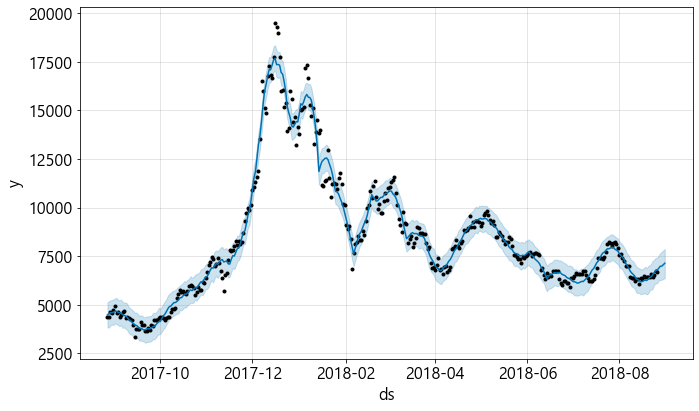

In [21]:
prophet.plot(forecast_data)
plt.show()

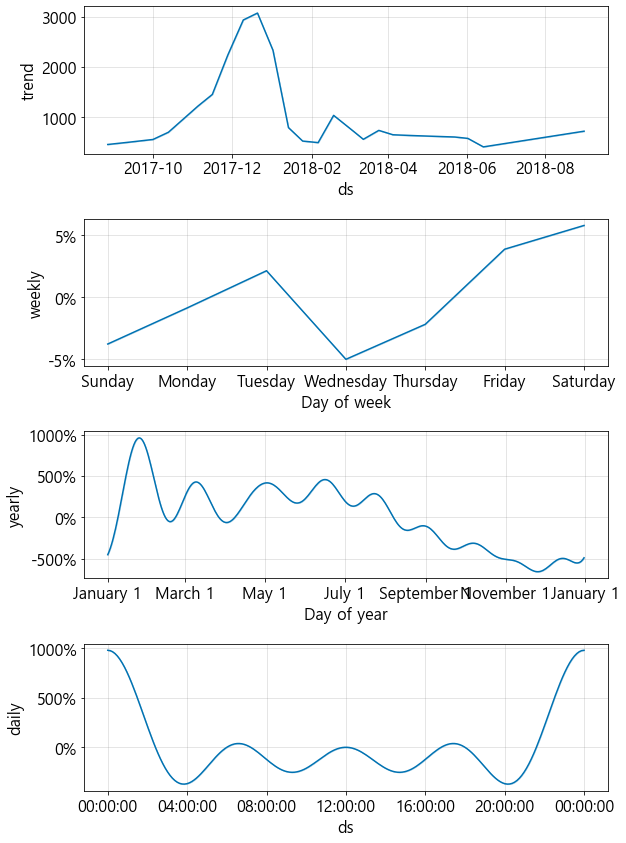

In [22]:
# 기간별 트랜드 분석 시각화
prophet.plot_components(forecast_data)
plt.show()

## 가격 예측

In [23]:
bitcoin_test_df = pd.read_csv('data10/market-price-test.csv')
bitcoin_test_df.columns = ['ds','y']
bitcoin_test_df

,ds,y
0,2018-08-27 00:00:00,6719.266154
1,2018-08-28 00:00:00,7000.040000
2,2018-08-29 00:00:00,7054.276429
3,2018-08-30 00:00:00,6932.662500
4,2018-08-31 00:00:00,6981.946154


In [24]:
# 예측결과
pred_y = forecast_data['yhat'].values[-5:]
# 진짜결과
test_y = bitcoin_test_df['y'].values

print(pred_y)
print(test_y)

[6882.30691473 6976.00253227 6986.4652067  7055.47483677 7133.44174812]
[6719.26615385 7000.04       7054.27642857 6932.6625     6981.94615385]


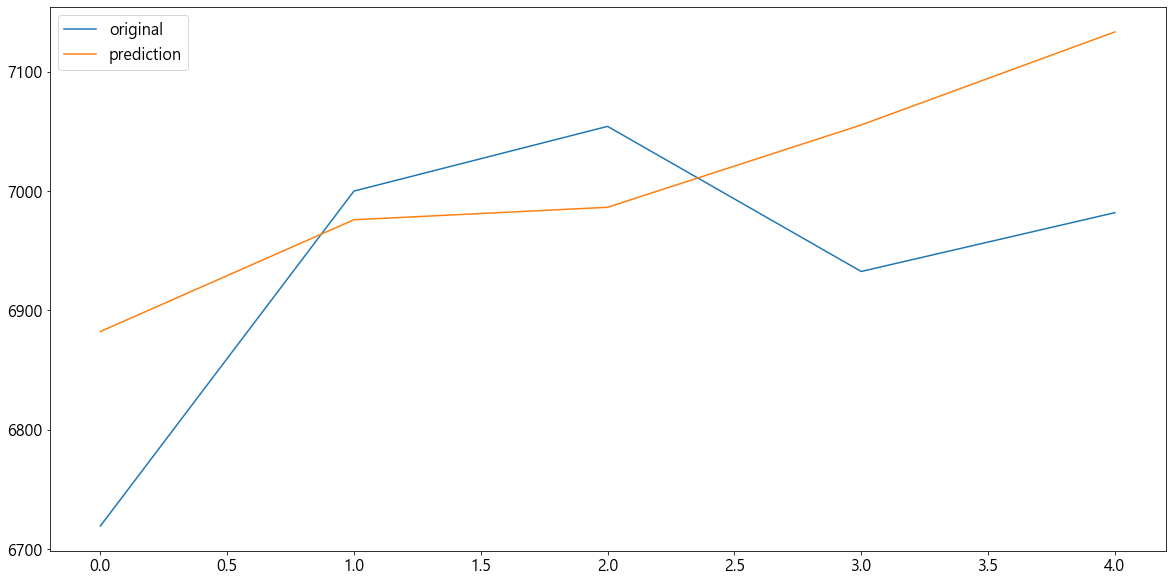

In [25]:
plt.plot(test_y, label='original')
plt.plot(pred_y, label='prediction')
plt.legend()
plt.show()
